# Data Literacy - Project
## Gender Share in Movies
#### Tobias Stumpp, Sophia Herrmann

## t-Test Hypothesis Testing

### Parameters

In [1]:
# Starting year of the period of years covered by the test
start_year = 1980
# Ending year of the period of years covered by the test
end_year = start_year + 40

# Split year of the period of years covered by the test that separates
# indicative data (>= start_year and < split_year)
# from
# data to be verified (>= split_year and < end_year).
split_year = start_year + 20

# Option to ignore movies where the average rating or the number of votes is below the respective 5% quantile.
ignore_irrelevant_movies = False

### Meta

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '../dat/'
os.chdir(path)

### Read Data

In [4]:
columns = list(pd.read_csv('data_movie.csv', nrows =1))
print(columns)

['tconst', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'category']


In [5]:
columns_to_read = [c for c in columns if c != 'genres']

data_movie = pd.read_csv('data_movie.csv', usecols = columns_to_read)

display(data_movie.info())
display(data_movie.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854511 entries, 0 to 854510
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          854511 non-null  object 
 1   startYear       854511 non-null  int64  
 2   runtimeMinutes  854511 non-null  int64  
 3   averageRating   854511 non-null  float64
 4   numVotes        854511 non-null  int64  
 5   category        854511 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 39.1+ MB


None

tconst  startYear  runtimeMinutes  averageRating  numVotes category
0  tt0000502       1905             100            4.5        14    actor
1  tt0000502       1905             100            4.5        14    actor
2  tt0000574       1906              70            6.1       747  actress
3  tt0000574       1906              70            6.1       747    actor
4  tt0000574       1906              70            6.1       747    actor

---

#### Provide the option to only include movies that are relevant based on the average rating and number of votes.

In [6]:
data_movie[['numVotes','averageRating']].describe()

numVotes  averageRating
count  8.545110e+05  854511.000000
mean   3.579196e+03       5.928503
std    2.920979e+04       1.263788
min    5.000000e+00       1.000000
25%    2.300000e+01       5.200000
50%    7.800000e+01       6.100000
75%    3.820000e+02       6.800000
max    1.555039e+06      10.000000

In [7]:
numVotes_split = data_movie['numVotes'].quantile(0.05)
numVotes_split

9.0

In [8]:
averageRating_split = data_movie['averageRating'].quantile(0.05)
averageRating_split

3.6

In [9]:
display(data_movie.shape)

(854511, 6)

In [10]:
if ignore_irrelevant_movies:
    data_movie = data_movie[(data_movie['numVotes'] > numVotes_split) & (data_movie['averageRating'] > averageRating_split)]

In [11]:
display(data_movie.shape)

(854511, 6)

---

#### Only include the data to movies of the selected range of years.

In [12]:
display(data_movie.shape)

(854511, 6)

In [13]:
data_movie = data_movie[(data_movie['startYear'] >= start_year) & (data_movie['startYear'] < end_year)]

In [14]:
display(data_movie.shape)

(545043, 6)

---

### Prepare Data

##### Add year span as a column

In [15]:
year_span_presplit = f"{start_year}-{split_year}"
year_span_postsplit = f"{split_year}-{end_year}"
year_span = np.where(data_movie['startYear'] < split_year, year_span_presplit, year_span_postsplit)
data_movie.insert(1, 'year_span' , year_span)

display(data_movie)

tconst  year_span  startYear  runtimeMinutes  averageRating  \
2495    tt0011216  2000-2020       2019              67            6.9   
2496    tt0011216  2000-2020       2019              67            6.9   
2497    tt0011216  2000-2020       2019              67            6.9   
2498    tt0011216  2000-2020       2019              67            6.9   
6056    tt0015724  1980-2000       1993             102            6.2   
...           ...        ...        ...             ...            ...   
854494  tt9915872  2000-2020       2019              97            6.9   
854507  tt9916538  2000-2020       2019             123            8.3   
854508  tt9916538  2000-2020       2019             123            8.3   
854509  tt9916538  2000-2020       2019             123            8.3   
854510  tt9916538  2000-2020       2019             123            8.3   

        numVotes category  
2495          30  actress  
2496          30    actor  
2497          30    actor  
2498          30    actor  
6056          25    actor  
...          ...      ...  
854494         8  actress  
854507         6  actress  
854508         6  actress  
854509         6    actor  
854510         6  actress  

[545043 rows x 7 columns]

##### Add counts and proportions on crew members

In [16]:
data_cast_numbers = pd.crosstab(data_movie['tconst'], data_movie['category']).reset_index().rename(columns = {
    'actor':'num_actors',
    'actress':'num_actresses',
})

data_cast_proportion = data_movie.groupby(['tconst'])['category'].value_counts(normalize=True).unstack().reset_index().fillna(0).rename(columns = {
    'actor':'prop_actors',
    'actress':'prop_actresses',
})

data_cast_gender_stat = pd.merge(data_cast_numbers, data_cast_proportion)
data_cast_gender_stat

category     tconst  num_actors  num_actresses  prop_actors  prop_actresses
0         tt0011216           3              1         0.75            0.25
1         tt0015724           2              2         0.50            0.50
2         tt0035423           3              1         0.75            0.25
3         tt0036177           3              1         0.75            0.25
4         tt0036606           3              1         0.75            0.25
...             ...         ...            ...          ...             ...
129988    tt9913936           4              0         1.00            0.00
129989    tt9914286           3              1         0.75            0.25
129990    tt9914942           3              1         0.75            0.25
129991    tt9915872           0              2         0.00            1.00
129992    tt9916538           1              3         0.25            0.75

[129993 rows x 5 columns]

In [17]:
data_movie_distinct = data_movie.drop(columns=['category']).drop_duplicates(['tconst']).reset_index(drop = True)
display(data_movie_distinct)

data_movie_gender_stat = pd.merge(data_movie_distinct, data_cast_gender_stat)
data_movie_gender_stat.groupby('year_span').apply(display)

tconst  year_span  startYear  runtimeMinutes  averageRating  \
0       tt0011216  2000-2020       2019              67            6.9   
1       tt0015724  1980-2000       1993             102            6.2   
2       tt0035423  2000-2020       2001             118            6.4   
3       tt0036177  2000-2020       2008             100            7.3   
4       tt0036606  1980-2000       1983             118            6.5   
...           ...        ...        ...             ...            ...   
129988  tt9913936  2000-2020       2019             135            7.2   
129989  tt9914286  2000-2020       2019              98            7.6   
129990  tt9914942  2000-2020       2019              74            6.9   
129991  tt9915872  2000-2020       2019              97            6.9   
129992  tt9916538  2000-2020       2019             123            8.3   

        numVotes  
0             30  
1             25  
2          82687  
3            118  
4            312  
...          ...  
129988        58  
129989       218  
129990       138  
129991         8  
129992         6  

[129993 rows x 6 columns]

tconst  year_span  startYear  runtimeMinutes  averageRating  \
1       tt0015724  1980-2000       1993             102            6.2   
4       tt0036606  1980-2000       1983             118            6.5   
5       tt0038687  1980-2000       1980              58            7.5   
6       tt0057461  1980-2000       1983              84            4.9   
7       tt0059325  1980-2000       1990             100            6.5   
...           ...        ...        ...             ...            ...   
129718  tt9799878  1980-2000       1996              65            1.8   
129797  tt9828802  1980-2000       1980              93            6.0   
129804  tt9832396  1980-2000       1988              71            6.0   
129857  tt9855210  1980-2000       1985              91            7.8   
129892  tt9870502  1980-2000       1994             108            5.0   

        numVotes  num_actors  num_actresses  prop_actors  prop_actresses  
1             25           2              2         0.50            0.50  
4            312           3              1         0.75            0.25  
5           1828           1              0         1.00            0.00  
6             21           4              0         1.00            0.00  
7            240           3              1         0.75            0.25  
...          ...         ...            ...          ...             ...  
129718        41           3              1         0.75            0.25  
129797        48           3              1         0.75            0.25  
129804        15           3              1         0.75            0.25  
129857         5           3              1         0.75            0.25  
129892         9           3              1         0.75            0.25  

[37339 rows x 10 columns]

tconst  year_span  startYear  runtimeMinutes  averageRating  \
0       tt0011216  2000-2020       2019              67            6.9   
2       tt0035423  2000-2020       2001             118            6.4   
3       tt0036177  2000-2020       2008             100            7.3   
23      tt0069049  2000-2020       2018             122            6.7   
2023    tt0083721  2000-2020       2009             102            6.2   
...           ...        ...        ...             ...            ...   
129988  tt9913936  2000-2020       2019             135            7.2   
129989  tt9914286  2000-2020       2019              98            7.6   
129990  tt9914942  2000-2020       2019              74            6.9   
129991  tt9915872  2000-2020       2019              97            6.9   
129992  tt9916538  2000-2020       2019             123            8.3   

        numVotes  num_actors  num_actresses  prop_actors  prop_actresses  
0             30           3              1         0.75            0.25  
2          82687           3              1         0.75            0.25  
3            118           3              1         0.75            0.25  
23          7065           2              2         0.50            0.50  
2023          55           3              1         0.75            0.25  
...          ...         ...            ...          ...             ...  
129988        58           4              0         1.00            0.00  
129989       218           3              1         0.75            0.25  
129990       138           3              1         0.75            0.25  
129991         8           0              2         0.00            1.00  
129992         6           1              3         0.25            0.75  

[92654 rows x 10 columns]

Empty DataFrame
Columns: []
Index: []

---

##### Split data into their year spans

In [18]:
data_movie_gender_stat_timespan_presplit, data_movie_gender_stat_timespan_postsplit = [
    g for _, g in data_movie_gender_stat.groupby(['year_span'])
]

In [19]:
display(data_movie_gender_stat_timespan_presplit)
display(data_movie_gender_stat_timespan_postsplit)

tconst  year_span  startYear  runtimeMinutes  averageRating  \
1       tt0015724  1980-2000       1993             102            6.2   
4       tt0036606  1980-2000       1983             118            6.5   
5       tt0038687  1980-2000       1980              58            7.5   
6       tt0057461  1980-2000       1983              84            4.9   
7       tt0059325  1980-2000       1990             100            6.5   
...           ...        ...        ...             ...            ...   
129718  tt9799878  1980-2000       1996              65            1.8   
129797  tt9828802  1980-2000       1980              93            6.0   
129804  tt9832396  1980-2000       1988              71            6.0   
129857  tt9855210  1980-2000       1985              91            7.8   
129892  tt9870502  1980-2000       1994             108            5.0   

        numVotes  num_actors  num_actresses  prop_actors  prop_actresses  
1             25           2              2         0.50            0.50  
4            312           3              1         0.75            0.25  
5           1828           1              0         1.00            0.00  
6             21           4              0         1.00            0.00  
7            240           3              1         0.75            0.25  
...          ...         ...            ...          ...             ...  
129718        41           3              1         0.75            0.25  
129797        48           3              1         0.75            0.25  
129804        15           3              1         0.75            0.25  
129857         5           3              1         0.75            0.25  
129892         9           3              1         0.75            0.25  

[37339 rows x 10 columns]

tconst  year_span  startYear  runtimeMinutes  averageRating  \
0       tt0011216  2000-2020       2019              67            6.9   
2       tt0035423  2000-2020       2001             118            6.4   
3       tt0036177  2000-2020       2008             100            7.3   
23      tt0069049  2000-2020       2018             122            6.7   
2023    tt0083721  2000-2020       2009             102            6.2   
...           ...        ...        ...             ...            ...   
129988  tt9913936  2000-2020       2019             135            7.2   
129989  tt9914286  2000-2020       2019              98            7.6   
129990  tt9914942  2000-2020       2019              74            6.9   
129991  tt9915872  2000-2020       2019              97            6.9   
129992  tt9916538  2000-2020       2019             123            8.3   

        numVotes  num_actors  num_actresses  prop_actors  prop_actresses  
0             30           3              1         0.75            0.25  
2          82687           3              1         0.75            0.25  
3            118           3              1         0.75            0.25  
23          7065           2              2         0.50            0.50  
2023          55           3              1         0.75            0.25  
...          ...         ...            ...          ...             ...  
129988        58           4              0         1.00            0.00  
129989       218           3              1         0.75            0.25  
129990       138           3              1         0.75            0.25  
129991         8           0              2         0.00            1.00  
129992         6           1              3         0.25            0.75  

[92654 rows x 10 columns]

In [20]:
display(data_movie_gender_stat_timespan_presplit.describe())
display(data_movie_gender_stat_timespan_postsplit.describe())

startYear  runtimeMinutes  averageRating      numVotes  \
count  37339.000000    37339.000000   37339.000000  3.733900e+04   
mean    1989.652133       94.122258       5.888034  4.388853e+03   
std        5.796338       14.771530       1.203386  3.438555e+04   
min     1980.000000       52.000000       1.000000  5.000000e+00   
25%     1985.000000       86.000000       5.100000  2.400000e+01   
50%     1989.000000       92.000000       6.000000  8.500000e+01   
75%     1995.000000      102.000000       6.800000  4.130000e+02   
max     1999.000000      135.000000       9.700000  1.555039e+06   

         num_actors  num_actresses   prop_actors  prop_actresses  
count  37339.000000   37339.000000  37339.000000    37339.000000  
mean       2.715847       1.667720      0.623368        0.376632  
std        1.217245       1.127883      0.227290        0.227290  
min        0.000000       0.000000      0.000000        0.000000  
25%        2.000000       1.000000      0.500000        0.250000  
50%        3.000000       2.000000      0.666667        0.333333  
75%        3.000000       2.000000      0.750000        0.500000  
max        9.000000       9.000000      1.000000        1.000000

startYear  runtimeMinutes  averageRating      numVotes  \
count  92654.000000    92654.000000   92654.000000  9.265400e+04   
mean    2011.457552       93.993514       5.951174  5.469363e+03   
std        5.393341       16.013381       1.373883  3.664108e+04   
min     2000.000000       52.000000       1.000000  5.000000e+00   
25%     2007.000000       85.000000       5.100000  2.700000e+01   
50%     2012.000000       93.000000       6.100000  1.150000e+02   
75%     2016.000000      104.000000       6.900000  5.990000e+02   
max     2019.000000      135.000000      10.000000  1.272676e+06   

         num_actors  num_actresses   prop_actors  prop_actresses  
count  92654.000000   92654.000000  92654.000000    92654.000000  
mean       2.550392       1.565620      0.624090        0.375910  
std        1.248609       1.088531      0.247325        0.247325  
min        0.000000       0.000000      0.000000        0.000000  
25%        2.000000       1.000000      0.500000        0.250000  
50%        2.000000       1.000000      0.666667        0.333333  
75%        3.000000       2.000000      0.750000        0.500000  
max       10.000000       9.000000      1.000000        1.000000

---

##### Reduce data to proportion of actresses

In [21]:
data_prop_actresses_timespan_presplit  = data_movie_gender_stat_timespan_presplit['prop_actresses'].to_frame().reset_index(drop=True)
data_prop_actresses_timespan_postsplit = data_movie_gender_stat_timespan_postsplit['prop_actresses'].to_frame().reset_index(drop=True)

display(data_prop_actresses_timespan_presplit)
display(data_prop_actresses_timespan_postsplit)

prop_actresses
0                0.50
1                0.25
2                0.00
3                0.00
4                0.25
...               ...
37334            0.25
37335            0.25
37336            0.25
37337            0.25
37338            0.25

[37339 rows x 1 columns]

prop_actresses
0                0.25
1                0.25
2                0.25
3                0.50
4                0.25
...               ...
92649            0.00
92650            0.25
92651            0.25
92652            1.00
92653            0.75

[92654 rows x 1 columns]

---

### Analyze Data

#### Visualize whether the data is Gaussian distributed.

In [22]:
np.random.seed(42)

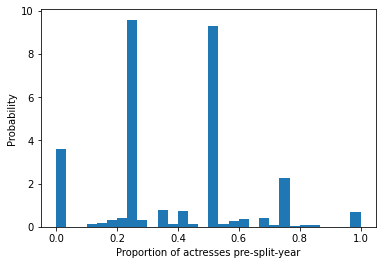

In [23]:
plt.hist(data_prop_actresses_timespan_presplit['prop_actresses'], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Proportion of actresses pre-split-year');

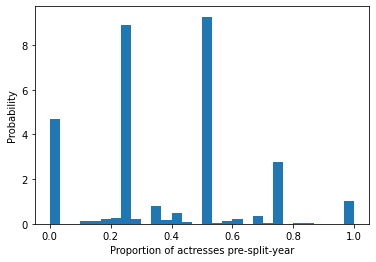

In [24]:
plt.hist(data_prop_actresses_timespan_postsplit['prop_actresses'], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Proportion of actresses pre-split-year');

#### Compute t-statistic

Our goal is to find out if the mean $\mu_1$ on the proportion of actresses in principal roles differs significantly  compared to the mean $\mu_0$ on the proportion of actesses in principal roles before the split year.

We perform a t-test unter the null hypothesis $H_0: \mu_1 = \mu_0$.

This tells us the probability to observe $m_1$, given $m_0$.

In [25]:
from scipy.stats import ttest_ind

In [26]:
def print_result_two_sided(p_val):
    alpha = 0.05
    # Significant results?
    significant = p_val <= alpha
    print(f"{'Yes' if significant else 'No'}, the result is {'significant' if significant else 'insignificant'} because given the pre-split-year data, observing the post-split-year data has a {p_val*100:.2f}% probability.")
    
def print_result_one_sided(t_val, p_val):
    alpha = 0.05
    # Significant results?
    significant = p_val/2 <= alpha
    direction = ('of being' + 'greater' if (t_val < 0) else 'smaller') if significant else ''
    print(f"{'Yes' if significant else 'No'}, the result is {'significant' if significant else 'insignificant'} because given the pre-split-year data, observing the post-split-year data has a {p_val*100:.2f}% probability.")

In [27]:
num_samples = np.min([
    data_prop_actresses_timespan_presplit['prop_actresses'].shape[0],
    data_prop_actresses_timespan_postsplit['prop_actresses'].shape[0]
])
num_samples

37339

#### Are the means $\mu_1 = \mu_0$ under the given unequal sample size?

In [28]:
res = ttest_ind(
    a=data_prop_actresses_timespan_presplit['prop_actresses'],
    b=data_prop_actresses_timespan_postsplit['prop_actresses'],
    equal_var=True
)
display(res)

print_result_two_sided(res.pvalue)

Ttest_indResult(statistic=0.4871844269145407, pvalue=0.6261284618829022)

No, the result is insignificant because given the pre-split-year data, observing the post-split-year data has a 62.61% probability.


#### Are the means $\mu_1 = \mu_0$ under an uniformly sampled but equal sample size?

In [29]:
res = ttest_ind(
    a=data_prop_actresses_timespan_presplit['prop_actresses'].sample(num_samples, replace=True, random_state=42),
    b=data_prop_actresses_timespan_postsplit['prop_actresses'].sample(num_samples, replace=True, random_state=42),
    equal_var=True
)
display(res)

print_result_two_sided(res.pvalue)

Ttest_indResult(statistic=1.1797681843227215, pvalue=0.2380961849995745)

No, the result is insignificant because given the pre-split-year data, observing the post-split-year data has a 23.81% probability.


#### Are the means $\mu_1 \neq \mu_0$ under the given unequal sample size?

In [30]:
res = ttest_ind(
    a=data_prop_actresses_timespan_presplit['prop_actresses'],
    b=data_prop_actresses_timespan_postsplit['prop_actresses'],
    equal_var=True
)
display(res)

print_result_one_sided(res.statistic, res.pvalue)

Ttest_indResult(statistic=0.4871844269145407, pvalue=0.6261284618829022)

No, the result is insignificant because given the pre-split-year data, observing the post-split-year data has a 62.61% probability.


#### Are the means $\mu_1 \neq \mu_0$ under an uniformly sampled but equal sample size?

In [31]:
res = ttest_ind(
    a=data_prop_actresses_timespan_presplit['prop_actresses'].sample(num_samples, replace=True, random_state=42),
    b=data_prop_actresses_timespan_postsplit['prop_actresses'].sample(num_samples, replace=True, random_state=42),
    equal_var=True
)
display(res)

print_result_one_sided(res.statistic, res.pvalue)

Ttest_indResult(statistic=1.1797681843227215, pvalue=0.2380961849995745)

No, the result is insignificant because given the pre-split-year data, observing the post-split-year data has a 23.81% probability.


---

#### Visualize data

In [32]:
sns.set_style('whitegrid')

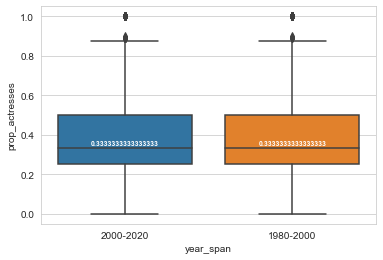

In [33]:
box_plot = sns.boxplot(x='year_span', y='prop_actresses', data=data_movie_gender_stat)

medians = data_movie_gender_stat.groupby(['year_span'])['prop_actresses'].median()
vertical_offset = data_movie_gender_stat['prop_actresses'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

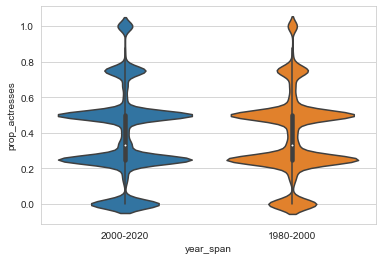

In [34]:
viol_plot = sns.violinplot(x='year_span', y='prop_actresses', data=data_movie_gender_stat)

medians = data_movie_gender_stat.groupby(['year_span'])['prop_actresses'].median()
vertical_offset = data_movie_gender_stat['prop_actresses'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

### Result

The t-tests as well as the plots suggest that the equality $\mu_1 = \mu_0$ but also the inequality $\mu_1 = \mu_0$ cannot be rejected. One reason for this could be a too discrete distribution of proportions or proportions between actors and actresses, i.e., a too strongly violated requirement of the t-test.
The number of main actors in movies is typically in the single digits.